In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import os
import sys

In [32]:
%matplotlib inline 
from matplotlib import pyplot as plt

In [33]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [61]:
from src.data import make_dataset
from src.models import train_model

ModuleNotFoundError: No module named 'tensorflow'

In [44]:
make_dataset.fetch_training_data(data_path=os.path.join('..','data','raw'), nrows=500)

(     0     1     2     3     4     5     6     7     8     9     ...  3126  \
 0     116   119   118   159   108   113   118   150    67    60  ...    21   
 1     177   152   129   183   180   154   128   182   181   156  ...   128   
 2      20    34    72    10    27    45    76    13    39    92  ...    81   
 3     102    92   136    20   134   156   144    33   135   162  ...    69   
 4     122   140   156    34   124   155   151    32   135   165  ...   157   
 ..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
 495   152   141   152    96   171   165   185   120   158   147  ...    73   
 496   100   109   137    21   100   109   140    22    84    98  ...   124   
 497    57    51    46   114    43    32    38    93    48    49  ...    54   
 498    43    49    93    10    68    98   102    18   103    91  ...    72   
 499    68    57    54   101    61    56    58    84    50    52  ...    31   
 
      3127  3128  3129  3130  3131  3132  3133  31

In [8]:
DATA_PATH = os.path.join('..','data','raw')

datafile = 'sat-6-full.mat'
data = loadmat(os.path.join(DATA_PATH, datafile))

In [38]:
!ls ../data/raw/

readme.txt	sat6annotations.csv  X_test_sat6.csv   y_test_sat6.csv
sat-4-full.mat	sat-6-full.mat	     X_train_sat6.csv  y_train_sat6.csv


In [10]:
data = loadmat(datafile)

In [12]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Oct 23 20:53:12 2014',
 '__version__': '1.0',
 '__globals__': [],
 'train_x': array([[[[116, 177,  20, ...,  74, 117, 203],
          [119, 152,  34, ..., 100, 124, 191],
          [118, 129,  72, ...,  92,  99, 153],
          [159, 183,  10, ...,  11, 187, 188]],
 
         [[108, 180,  27, ...,  60, 108, 208],
          [113, 154,  45, ...,  88, 113, 195],
          [118, 128,  76, ...,  82,  83, 155],
          [150, 182,  13, ...,  10, 182, 188]],
 
         [[ 67, 181,  39, ...,  34, 112, 201],
          [ 60, 156,  92, ...,  41, 116, 187],
          [ 59, 129,  77, ...,  75,  92, 155],
          [ 93, 180,   7, ...,   7, 187, 185]],
 
         ...,
 
         [[ 29, 184,  53, ...,  60, 127, 194],
          [ 28, 164,  64, ...,  79, 126, 180],
          [ 42, 133, 102, ...,  85, 115, 149],
          [ 32, 177,  10, ...,   7, 170, 186]],
 
         [[ 36, 185,  60, ...,  33, 126, 197],
          [ 32, 164,  68

In [48]:
data['train_x'].dtype

dtype('uint8')

In [14]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train_x', 'test_x', 'train_y', 'test_y', 'annotations'])

In [15]:
data['__header__']

b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Oct 23 20:53:12 2014'

In [18]:
data['annotations']

array([[array(['100000'], dtype='<U6'), array(['building'], dtype='<U8')],
       [array(['010000'], dtype='<U6'),
        array(['barren land'], dtype='<U11')],
       [array(['001000'], dtype='<U6'), array(['trees'], dtype='<U5')],
       [array(['000100'], dtype='<U6'),
        array(['grassland'], dtype='<U9')],
       [array(['000010'], dtype='<U6'), array(['road'], dtype='<U4')],
       [array(['000001'], dtype='<U6'), array(['water'], dtype='<U5')]],
      dtype=object)

In [92]:
data['train_y']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]], dtype=uint8)

[0 0 0 ... 0 0 0]


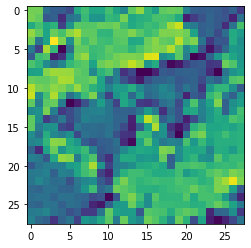

In [91]:
plt.imshow(data['train_x'][:,:,2,0])

In [88]:
data['train_x'].shape

(28, 28, 4, 324000)

In [87]:
data['train_x'][:,:,:,0].size

3136

In [82]:
data['train_x'].size

1016064000

In [81]:
data['train_y'].shape

(6, 324000)

In [ ]:
df = pd.read_csv('../data/raw/X_train_sat6.csv')
df

In [12]:
annotations = pd.read_csv('../data/raw/sat6annotations.csv', header=None)
annots_dict = {}
for i in range(len(annotations)):
  annots_dict[ annotations.loc[i][0]] = (annotations.loc[0][1:].values).tolist()
annots_dict

{'building': [1, 0, 0, 0, 0, 0],
 'barren_land': [1, 0, 0, 0, 0, 0],
 'trees': [1, 0, 0, 0, 0, 0],
 'grassland': [1, 0, 0, 0, 0, 0],
 'road': [1, 0, 0, 0, 0, 0],
 'water': [1, 0, 0, 0, 0, 0]}

In [2]:
data['train_x'][:,:,:]

NameError: name 'data' is not defined

In [56]:
!ls ..

data	       flask.py     models     README.md   requirements.txt  testing
Dockerfile     kaggle.json  notebooks  references  setup.py
file_plan.txt  LICENSE	    outputs    reports	   src


In [60]:
who

DATA_PATH	 annotations	 annots_dict	 data	 datafile	 get_file_paths	 i	 loadmat	 make_dataset	 
module_path	 np	 os	 pd	 plt	 sys	 
